Dataset Preview:
   tenure  monthly_charges   contract_type  support_calls  Churn
0      52       119.408165        One year              3      0
1      15        21.107855        Two year              2      0
2      61        93.017345  Month-to-month              9      1
3      21        77.178932  Month-to-month              8      0
4      24        63.405218  Month-to-month              0      0


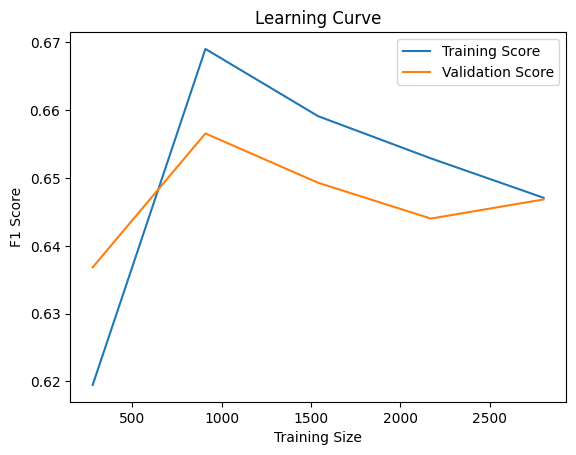

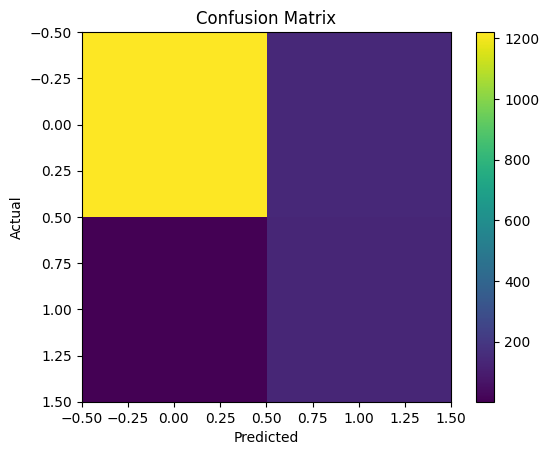


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.90      0.94      1363
           1       0.49      0.99      0.65       137

    accuracy                           0.90      1500
   macro avg       0.74      0.94      0.80      1500
weighted avg       0.95      0.90      0.92      1500



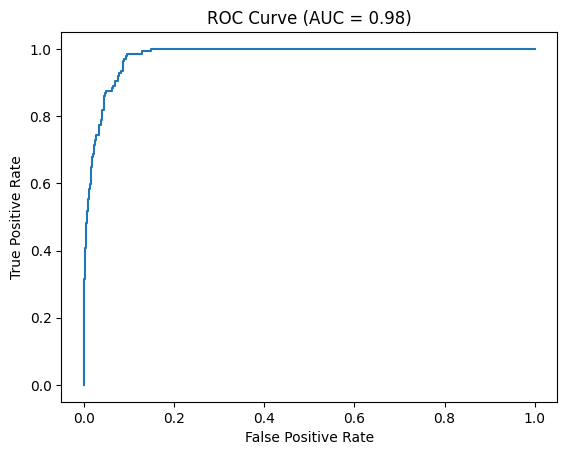

ROC-AUC Score: 0.9790179456008911


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
n = 5000  # number of customers

tenure = np.random.randint(1, 72, n)
monthly_charges = np.random.uniform(20, 120, n)
contract_type = np.random.choice(['Month-to-month', 'One year', 'Two year'], n)
support_calls = np.random.randint(0, 10, n)

# Realistic churn logic
churn = (
    (tenure < 12).astype(int) +
    (monthly_charges > 80).astype(int) +
    (contract_type == 'Month-to-month').astype(int) +
    (support_calls > 5).astype(int)
)

churn = (churn > 2).astype(int)

df = pd.DataFrame({
    "tenure": tenure,
    "monthly_charges": monthly_charges,
    "contract_type": contract_type,
    "support_calls": support_calls,
    "Churn": churn
})

print("Dataset Preview:")
print(df.head())

df = pd.get_dummies(df, drop_first=True)

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring="f1"
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("F1 Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = %0.2f)" % roc_auc)
plt.show()

print("ROC-AUC Score:", roc_auc)